In [209]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score
from sklearn.model_selection import GridSearchCV, validation_curve

In [210]:
data = {
    'CustomerID': [f'C{str(i).zfill(3)}' for i in range(1, 26)],
    'Tenure': [1, 24, 36, 12, 48, 2, 8, 34, 2, 22, 10, 60, 40, 5, 28, 3, 18, 9, 11, 32, 4, 55, 13, 20, 15],
    'ContractType': ['Monthly', 'One year', 'Two year', 'Monthly', 'Two year', 'Monthly', 'Monthly', 'Two year', 'Monthly', 'One year', 'Monthly', 'Two year', 'Two year', 'Monthly', 'One year', 'Monthly', 'One year', 'Monthly', 'Monthly', 'Two year', 'Monthly', 'Two year', 'Monthly', 'One year', 'Monthly'],
    'MonthlyCharges': [29.85, 56.95, 42.30, 70.20, 89.55, 25.50, 32.85, 40.75, 18.95, 55.50, 20.25, 99.95, 84.60, 45.95, 60.40, 30.70, 50.85, 33.55, 21.95, 66.25, 35.60, 90.50, 27.85, 52.85, 38.95],
    'TotalCharges': [29.85, 1366.75, 1530.60, 704.40, 4229.40, 51.00, 262.80, 1385.50, 37.90, 1221.00, 202.50, 5997.00, 3384.00, 229.75, 1691.20, 92.10, 915.30, 301.95, 241.45, 2124.00, 142.40, 4977.50, 362.05, 1057.00, 584.25],
    'InternetService': ['DSL', 'Fiber optic', 'DSL', 'Fiber optic', 'Fiber optic', 'DSL', 'DSL', 'Fiber optic', 'None', 'Fiber optic', 'None', 'Fiber optic', 'DSL', 'DSL', 'Fiber optic', 'DSL', 'Fiber optic', 'None', 'None', 'DSL', 'DSL', 'Fiber optic', 'DSL', 'Fiber optic', 'None'],
    'Churn': [1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1]
}

df = pd.DataFrame(data)
df.head(10)

,CustomerID,Tenure,ContractType,MonthlyCharges,TotalCharges,InternetService,Churn
0,C001,1,Monthly,29.85,29.85,DSL,1
1,C002,24,One year,56.95,1366.75,Fiber optic,0
2,C003,36,Two year,42.30,1530.60,DSL,0
3,C004,12,Monthly,70.20,704.40,Fiber optic,1
4,C005,48,Two year,89.55,4229.40,Fiber optic,0
5,C006,2,Monthly,25.50,51.00,DSL,1
6,C007,8,Monthly,32.85,262.80,DSL,0
7,C008,34,Two year,40.75,1385.50,Fiber optic,0
8,C009,2,Monthly,18.95,37.90,None,1
9,C010,22,One year,55.50,1221.00,Fiber optic,0


In [211]:
# Exploratory Data Analysis
print("Basic Information:")
print(df.info())

print("\nSummary Statistics:")
print(df.describe())

print("\nChurn Distribution:")
print(df['Churn'].value_counts())

Basic Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerID       25 non-null     object 
 1   Tenure           25 non-null     int64  
 2   ContractType     25 non-null     object 
 3   MonthlyCharges   25 non-null     float64
 4   TotalCharges     25 non-null     float64
 5   InternetService  25 non-null     object 
 6   Churn            25 non-null     int64  
dtypes: float64(2), int64(2), object(3)
memory usage: 1.5+ KB
None

Summary Statistics:
          Tenure  MonthlyCharges  TotalCharges      Churn
count  25.000000       25.000000     25.000000  25.000000
mean   20.480000       48.904000   1324.866000   0.480000
std    17.139428       23.536355   1638.843859   0.509902
min     1.000000       18.950000     29.850000   0.000000
25%     8.000000       30.700000    229.750000   0.000000
50%    15.000000       42.300

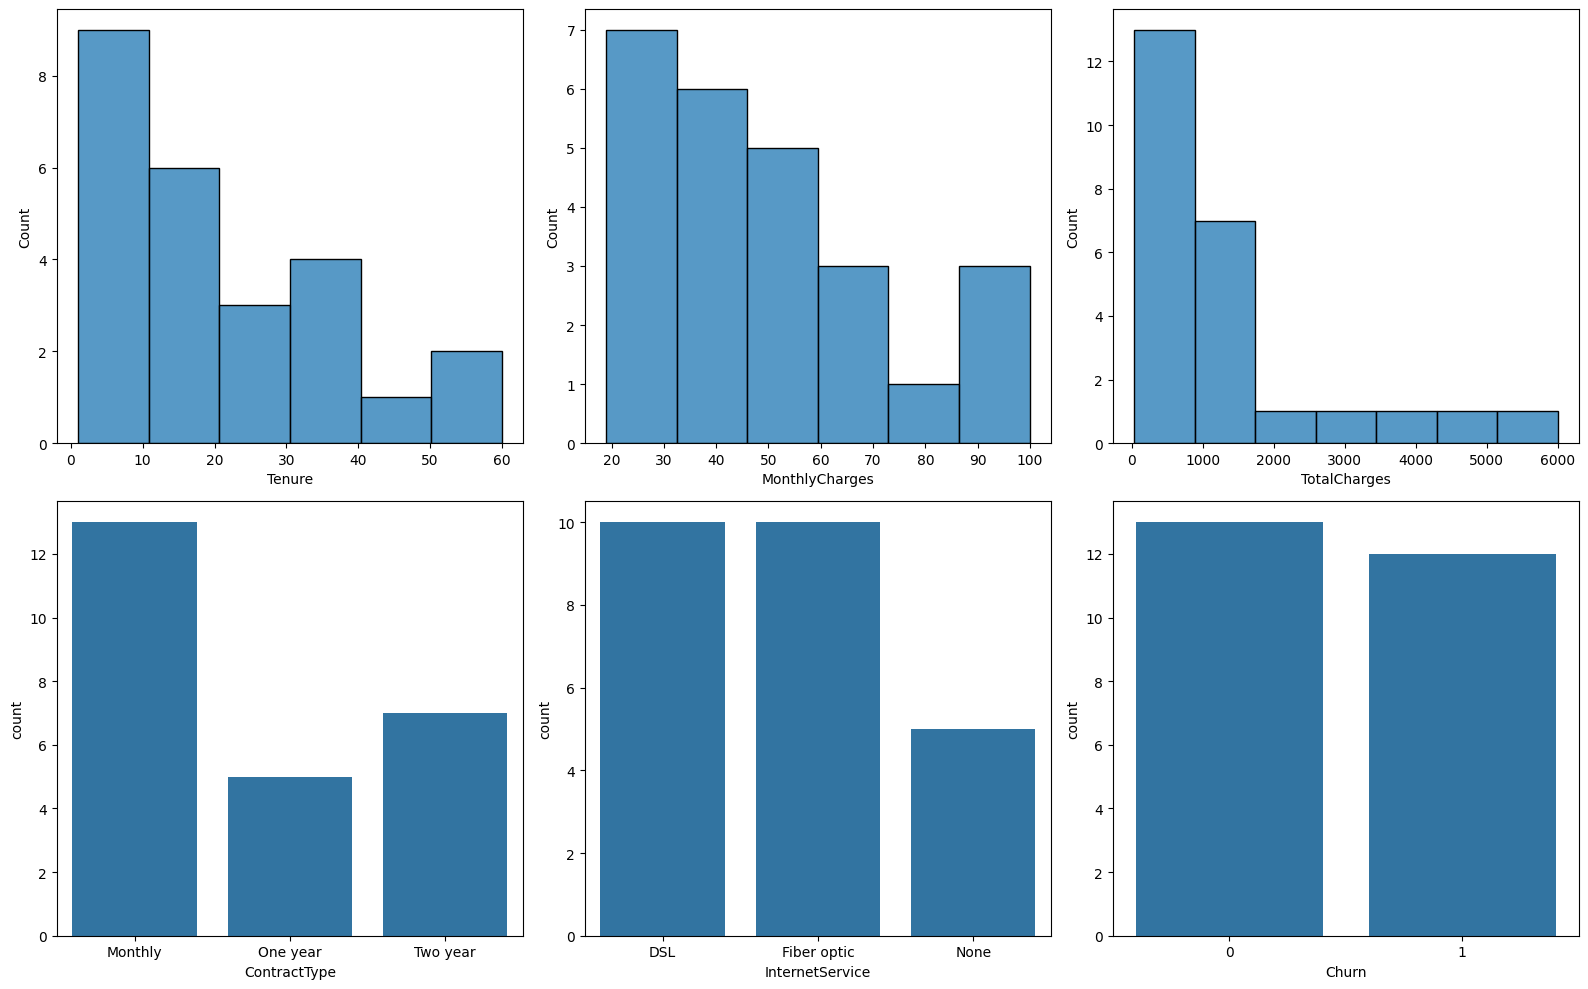

In [212]:
# Visualize relationships between variables
plt.figure(figsize=(16, 10))

plt.subplot(2, 3, 1)
sns.histplot(df['Tenure'])

plt.subplot(2, 3, 2)
sns.histplot(df['MonthlyCharges'])

plt.subplot(2, 3, 3)
sns.histplot(df['TotalCharges'])

plt.subplot(2, 3, 4)
sns.countplot(x='ContractType', data=df)

plt.subplot(2, 3, 5)
sns.countplot(x='InternetService', data=df)

plt.subplot(2, 3, 6)
sns.countplot(x='Churn', data=df)

plt.tight_layout()
plt.show()

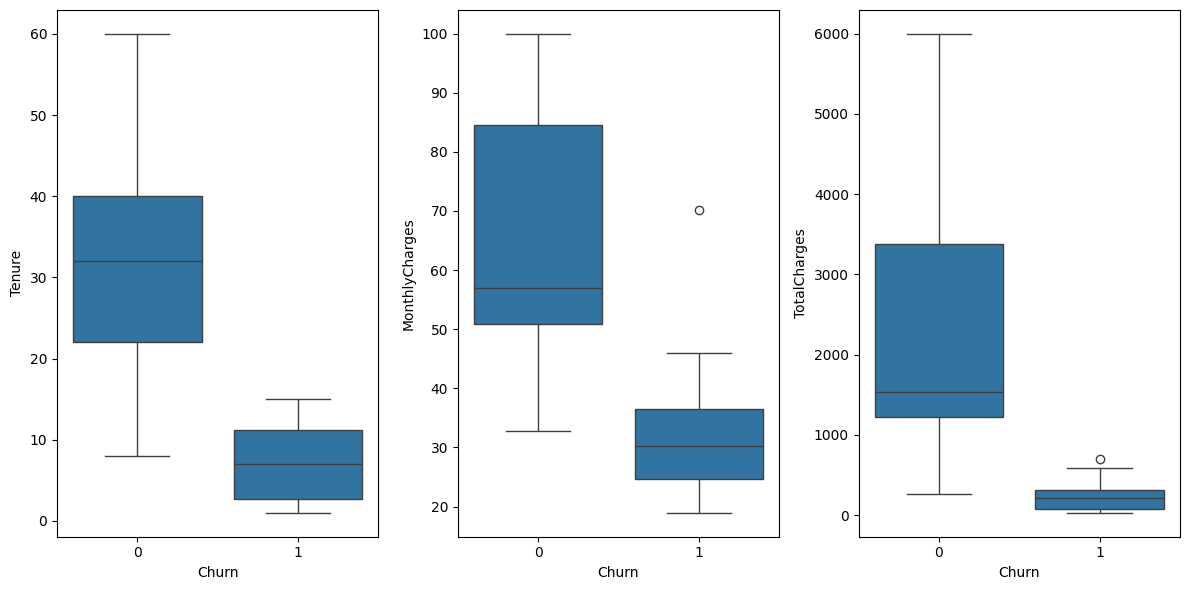

In [213]:
# Relationships with Churn
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
sns.boxplot(x='Churn', y='Tenure', data=df)

plt.subplot(1, 3, 2)
sns.boxplot(x='Churn', y='MonthlyCharges', data=df)

plt.subplot(1, 3, 3)
sns.boxplot(x='Churn', y='TotalCharges', data=df)

plt.tight_layout()
plt.show()

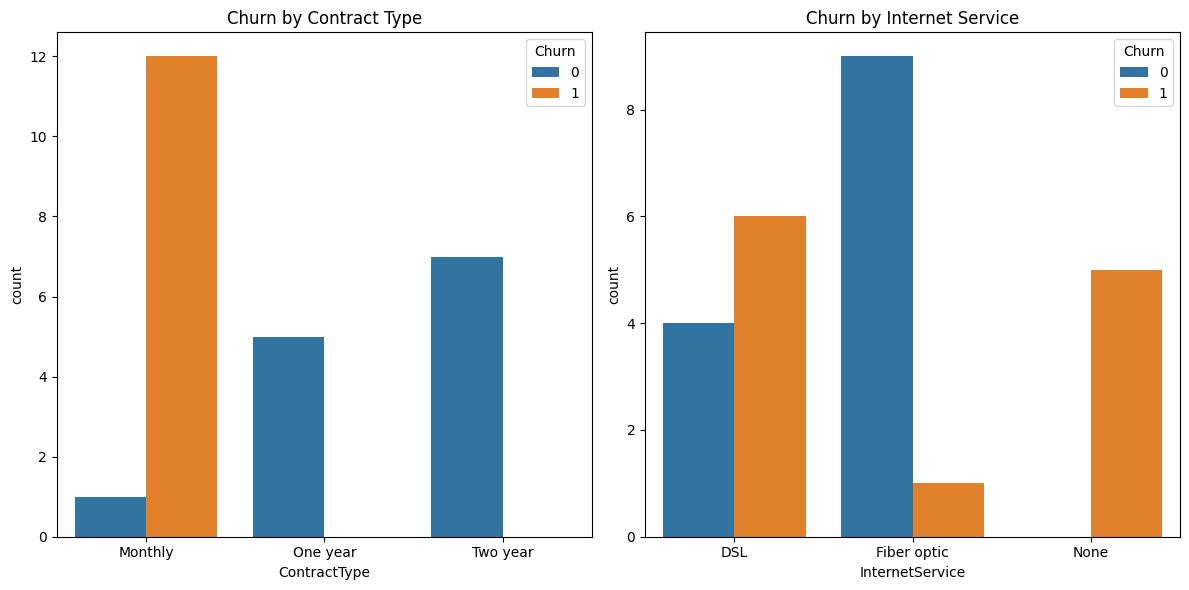

In [214]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.countplot(x='ContractType', hue='Churn', data=df)
plt.title("Churn by Contract Type")

plt.subplot(1, 2, 2)
sns.countplot(x='InternetService', hue='Churn', data=df)
plt.title("Churn by Internet Service")

plt.tight_layout()
plt.show()

In [215]:
df.columns

Index(['CustomerID', 'Tenure', 'ContractType', 'MonthlyCharges',
       'TotalCharges', 'InternetService', 'Churn'],
      dtype='object')

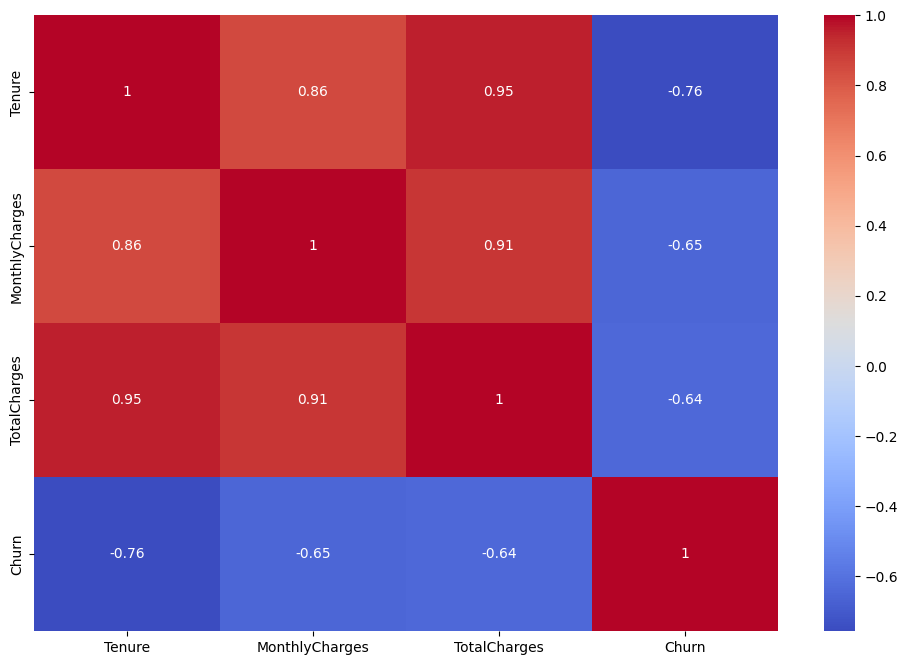

In [216]:
corr = df[['Tenure', 'MonthlyCharges','TotalCharges', 'Churn']].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

In [217]:
# Cross-tabulation for categorical data
print(pd.crosstab(df['ContractType'], df['Churn']))
print(pd.crosstab(df['InternetService'], df['Churn']))

Churn         0   1
ContractType       
Monthly       1  12
One year      5   0
Two year      7   0
Churn            0  1
InternetService      
DSL              4  6
Fiber optic      9  1
None             0  5


In [218]:
# Handle categorical variables
df = pd.get_dummies(df, columns=['ContractType', 'InternetService'], drop_first=True)

# Standardize numeric variables
scaler = MinMaxScaler()
df[['Tenure', 'MonthlyCharges', 'TotalCharges']] = scaler.fit_transform(df[['Tenure', 'MonthlyCharges', 'TotalCharges']])

# Split data
X = df.drop(columns=['CustomerID', 'Churn'])
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [219]:
# Logistic Regression
log_model = LogisticRegression(random_state=42)
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)

# Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# SVM
svm_model = SVC(probability=True, random_state=42)
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

# Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

# Adaboost Model
ada_model = AdaBoostClassifier(random_state=42)
ada_model.fit(X_train, y_train)
y_pred_ada = ada_model.predict(X_test)

c:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


In [220]:
# Evaluation function
def evaluate_model(model, X_test, y_test, y_pred):
    print(f"Model: {model}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("ROC AUC Score:")
    print(roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]))

# Evaluate Logistic Regression
evaluate_model(log_model, X_test, y_test, y_pred_log)

Model: LogisticRegression(random_state=42)
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         2

    accuracy                           1.00         5
   macro avg       1.00      1.00      1.00         5
weighted avg       1.00      1.00      1.00         5

Confusion Matrix:
[[3 0]
 [0 2]]
ROC AUC Score:
1.0


In [221]:
# Predictions
log_train_pred = log_model.predict(X_train)
log_test_pred = log_model.predict(X_test)
log_train_roc_auc = roc_auc_score(y_train, log_model.predict_proba(X_train)[:, 1])
log_test_roc_auc = roc_auc_score(y_test, log_model.predict_proba(X_test)[:, 1])

# Performance Metrics
print("Logistic Regression:")
print(f"Train Accuracy: {accuracy_score(y_train, log_train_pred)}")
print(f"Test Accuracy: {accuracy_score(y_test, log_test_pred)}")
print(f"Train ROC AUC: {log_train_roc_auc}")
print(f"Test ROC AUC: {log_test_roc_auc}")

Logistic Regression:
Train Accuracy: 0.9
Test Accuracy: 1.0
Train ROC AUC: 0.97
Test ROC AUC: 1.0


In [222]:
# Evaluate Random Forest
evaluate_model(rf_model, X_test, y_test, y_pred_rf)

Model: RandomForestClassifier(random_state=42)
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         2

    accuracy                           1.00         5
   macro avg       1.00      1.00      1.00         5
weighted avg       1.00      1.00      1.00         5

Confusion Matrix:
[[3 0]
 [0 2]]
ROC AUC Score:
1.0


In [223]:
# Predictions
rf_train_pred = rf_model.predict(X_train)
rf_test_pred = rf_model.predict(X_test)
rf_train_roc_auc = roc_auc_score(y_train, rf_model.predict_proba(X_train)[:, 1])
rf_test_roc_auc = roc_auc_score(y_test, rf_model.predict_proba(X_test)[:, 1])

# Performance Metrics
print("Random Forest:")
print(f"Train Accuracy: {accuracy_score(y_train, rf_train_pred)}")
print(f"Test Accuracy: {accuracy_score(y_test, rf_test_pred)}")
print(f"Train ROC AUC: {rf_train_roc_auc}")
print(f"Test ROC AUC: {rf_test_roc_auc}")

Random Forest:
Train Accuracy: 1.0
Test Accuracy: 1.0
Train ROC AUC: 1.0
Test ROC AUC: 1.0


In [224]:
# Evaluate SVM
evaluate_model(svm_model, X_test, y_test, y_pred_svm)

Model: SVC(probability=True, random_state=42)
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         2

    accuracy                           1.00         5
   macro avg       1.00      1.00      1.00         5
weighted avg       1.00      1.00      1.00         5

Confusion Matrix:
[[3 0]
 [0 2]]
ROC AUC Score:
1.0


In [225]:
# Predictions
svm_train_pred = svm_model.predict(X_train)
svm_test_pred = svm_model.predict(X_test)
svm_train_roc_auc = roc_auc_score(y_train, svm_model.predict_proba(X_train)[:, 1])
svm_test_roc_auc = roc_auc_score(y_test, svm_model.predict_proba(X_test)[:, 1])

# Performance Metrics
print("SVM:")
print(f"Train Accuracy: {accuracy_score(y_train, svm_train_pred)}")
print(f"Test Accuracy: {accuracy_score(y_test, svm_test_pred)}")
print(f"Train ROC AUC: {svm_train_roc_auc}")
print(f"Test ROC AUC: {svm_test_roc_auc}")

SVM:
Train Accuracy: 0.95
Test Accuracy: 1.0
Train ROC AUC: 0.93
Test ROC AUC: 1.0


In [226]:
# Evaluate Decision Tree
evaluate_model(dt_model, X_test, y_test, y_pred_dt)

Model: DecisionTreeClassifier(random_state=42)
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.67      0.80         3
           1       0.67      1.00      0.80         2

    accuracy                           0.80         5
   macro avg       0.83      0.83      0.80         5
weighted avg       0.87      0.80      0.80         5

Confusion Matrix:
[[2 1]
 [0 2]]
ROC AUC Score:
0.8333333333333334


In [227]:
# Predictions
dt_train_pred = dt_model.predict(X_train)
dt_test_pred = dt_model.predict(X_test)
dt_train_roc_auc = roc_auc_score(y_train, dt_model.predict_proba(X_train)[:, 1])
dt_test_roc_auc = roc_auc_score(y_test, dt_model.predict_proba(X_test)[:, 1])

# Performance Metrics
print("Decision Tree:")
print(f"Train Accuracy: {accuracy_score(y_train, dt_train_pred)}")
print(f"Test Accuracy: {accuracy_score(y_test, dt_test_pred)}")
print(f"Train ROC AUC: {dt_train_roc_auc}")
print(f"Test ROC AUC: {dt_test_roc_auc}")

Decision Tree:
Train Accuracy: 1.0
Test Accuracy: 0.8
Train ROC AUC: 1.0
Test ROC AUC: 0.8333333333333334


In [228]:
# Evaluate Adaboost
evaluate_model(ada_model, X_test, y_test, y_pred_ada)

Model: AdaBoostClassifier(random_state=42)
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.67      0.80         3
           1       0.67      1.00      0.80         2

    accuracy                           0.80         5
   macro avg       0.83      0.83      0.80         5
weighted avg       0.87      0.80      0.80         5

Confusion Matrix:
[[2 1]
 [0 2]]
ROC AUC Score:
1.0


In [229]:
# Step 2: Evaluate the Model
y_train_pred = ada_model.predict(X_train)
y_test_pred = ada_model.predict(X_test)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
train_roc_auc = roc_auc_score(y_train, ada_model.predict_proba(X_train)[:, 1])
test_roc_auc = roc_auc_score(y_test, ada_model.predict_proba(X_test)[:, 1])

print("AdaBoost Model Evaluation:")
print(f"Train Accuracy: {train_accuracy}")
print(f"Test Accuracy: {test_accuracy}")
print(f"Train ROC AUC: {train_roc_auc}")
print(f"Test ROC AUC: {test_roc_auc}")

AdaBoost Model Evaluation:
Train Accuracy: 1.0
Test Accuracy: 0.8
Train ROC AUC: 1.0
Test ROC AUC: 1.0


In [230]:
# optimizing Random Forest
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30]
}

grid_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='roc_auc')
grid_rf.fit(X_train, y_train)

best_rf = grid_rf.best_estimator_
y_pred_best_rf = best_rf.predict(X_test)
evaluate_model(best_rf, X_test, y_test, y_pred_best_rf)
print("Best Parameters for Random Forest: ", grid_rf.best_params_)

Model: RandomForestClassifier(n_estimators=50, random_state=42)
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.67      0.80         3
           1       0.67      1.00      0.80         2

    accuracy                           0.80         5
   macro avg       0.83      0.83      0.80         5
weighted avg       0.87      0.80      0.80         5

Confusion Matrix:
[[2 1]
 [0 2]]
ROC AUC Score:
1.0
Best Parameters for Random Forest:  {'max_depth': None, 'n_estimators': 50}


In [231]:
# Optimize Logistic Regression
param_grid_log = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']  # 'liblinear' is chosen to allow L1 penalty
}

# param_grid_log = {
#     'C': [0.01, 0.1, 1, 10, 100],
#     'penalty': ['l1', 'l2', 'elasticnet'],  # If using saga, you can include "elasticnet".
#     'solver': ['liblinear', 'lbfgs', 'saga'],  # Include 'saga' for 'elasticnet'.
#     'max_iter': [100, 200, 300],
#     'class_weight': [None, 'balanced'],
# }

grid_log = GridSearchCV(LogisticRegression(random_state=42), param_grid_log, cv=5, scoring='roc_auc')
grid_log.fit(X_train, y_train)

best_log = grid_log.best_estimator_
y_pred_best_log = best_log.predict(X_test)
evaluate_model(best_log, X_test, y_test, y_pred_best_log)
print("Best Parameters for Logistic Regression: ", grid_log.best_params_)

Model: LogisticRegression(C=0.01, random_state=42, solver='liblinear')
Classification Report:
              precision    recall  f1-score   support

           0       0.75      1.00      0.86         3
           1       1.00      0.50      0.67         2

    accuracy                           0.80         5
   macro avg       0.88      0.75      0.76         5
weighted avg       0.85      0.80      0.78         5

Confusion Matrix:
[[3 0]
 [1 1]]
ROC AUC Score:
1.0
Best Parameters for Logistic Regression:  {'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear'}


In [232]:
# Optimize SVM
param_grid_svm = {
    'C': [0.01, 0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}

grid_svm = GridSearchCV(SVC(probability=True, random_state=42), param_grid_svm, cv=5, scoring='roc_auc')
grid_svm.fit(X_train, y_train)

best_svm = grid_svm.best_estimator_
y_pred_best_svm = best_svm.predict(X_test)
evaluate_model(best_svm, X_test, y_test, y_pred_best_svm)
print("Best Parameters for SVM: ", grid_svm.best_params_)

Model: SVC(C=0.01, kernel='linear', probability=True, random_state=42)
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         2

    accuracy                           1.00         5
   macro avg       1.00      1.00      1.00         5
weighted avg       1.00      1.00      1.00         5

Confusion Matrix:
[[3 0]
 [0 2]]
ROC AUC Score:
0.0
Best Parameters for SVM:  {'C': 0.01, 'gamma': 'scale', 'kernel': 'linear'}


In [233]:
# Define the parameter grid
param_grid_dt = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10]
}

# Perform Grid Search
grid_dt = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid_dt, cv=5, scoring='roc_auc')
grid_dt.fit(X_train, y_train)

# Get the best model
best_dt = grid_dt.best_estimator_
y_pred_best_dt = best_dt.predict(X_test)

# Evaluate the optimized Decision Tree model
evaluate_model(best_dt, X_test, y_test, y_pred_best_dt)

print("Best Parameters for Decision Tree: ", grid_dt.best_params_)

Model: DecisionTreeClassifier(min_samples_split=10, random_state=42)
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.67      0.80         3
           1       0.67      1.00      0.80         2

    accuracy                           0.80         5
   macro avg       0.83      0.83      0.80         5
weighted avg       0.87      0.80      0.80         5

Confusion Matrix:
[[2 1]
 [0 2]]
ROC AUC Score:
0.6666666666666667
Best Parameters for Decision Tree:  {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10}


In [234]:
# Define param grid to check for range of n_estimators
param_grid = {'n_estimators': [50, 100, 200, 300]} 

# Perform Grid Search with cross-validation for the adaboost model
grid_search = GridSearchCV(ada_model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Find best values of n_estimators
best_n_estimators = grid_search.best_params_['n_estimators']
print(f'Best Parameters for AdaBoost Model: {best_n_estimators}')

c:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default)

Best Parameters for AdaBoost Model: 50


c:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


c:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default)

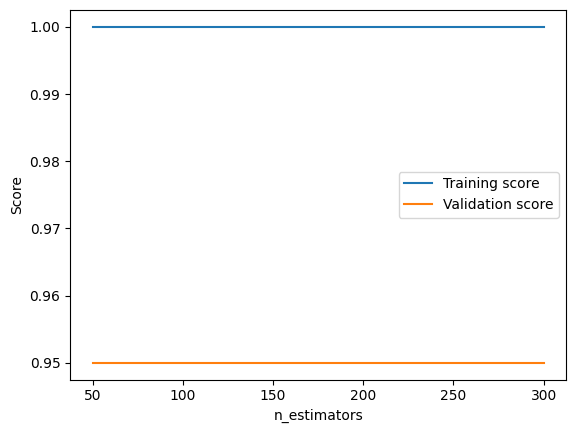

In [235]:
# Plotting the values for best n_estimators
train_scores, test_scores = validation_curve(
    AdaBoostClassifier(), X_train, y_train, param_name='n_estimators', param_range = param_grid['n_estimators'], cv=5
    )

plt.figure()
plt.plot(param_grid['n_estimators'], np.mean(train_scores, axis=1), label='Training score')
plt.plot(param_grid['n_estimators'], np.mean(test_scores, axis=1), label='Validation score')
plt.xlabel('n_estimators')
plt.ylabel('Score')
plt.legend()
plt.show()

In [236]:
importances = best_dt.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
print(feature_importance_df.sort_values(by='Importance', ascending=False))

                       Feature  Importance
2                 TotalCharges    0.974026
0                       Tenure    0.025974
1               MonthlyCharges    0.000000
3        ContractType_One year    0.000000
4        ContractType_Two year    0.000000
5  InternetService_Fiber optic    0.000000
6         InternetService_None    0.000000


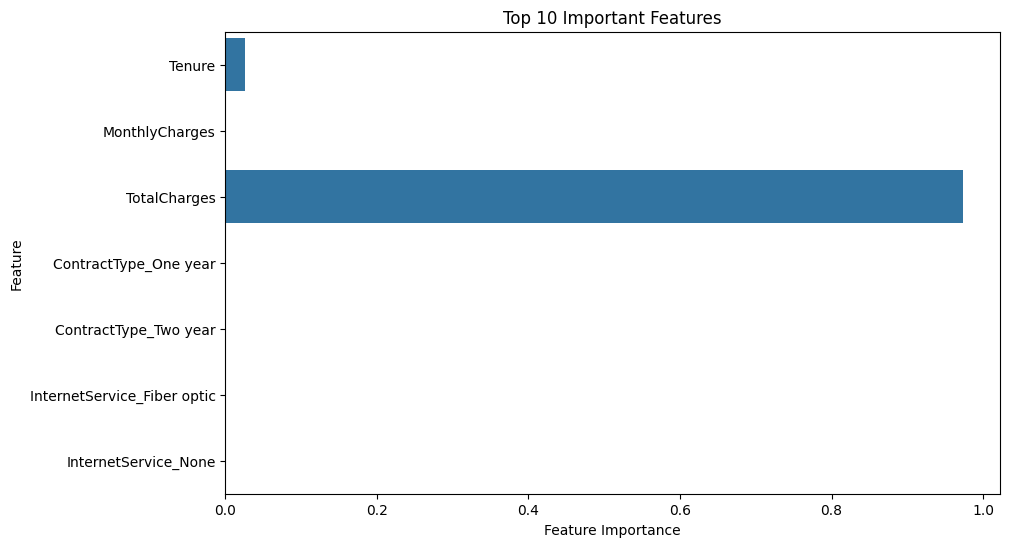

In [237]:
# Plot the top 10 features
plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance_df, x='Importance', y='Feature')
plt.title('Top 10 Important Features')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.show()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_22216\1219240222.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_features['Importance'], y=top_features['Feature'], palette='viridis')


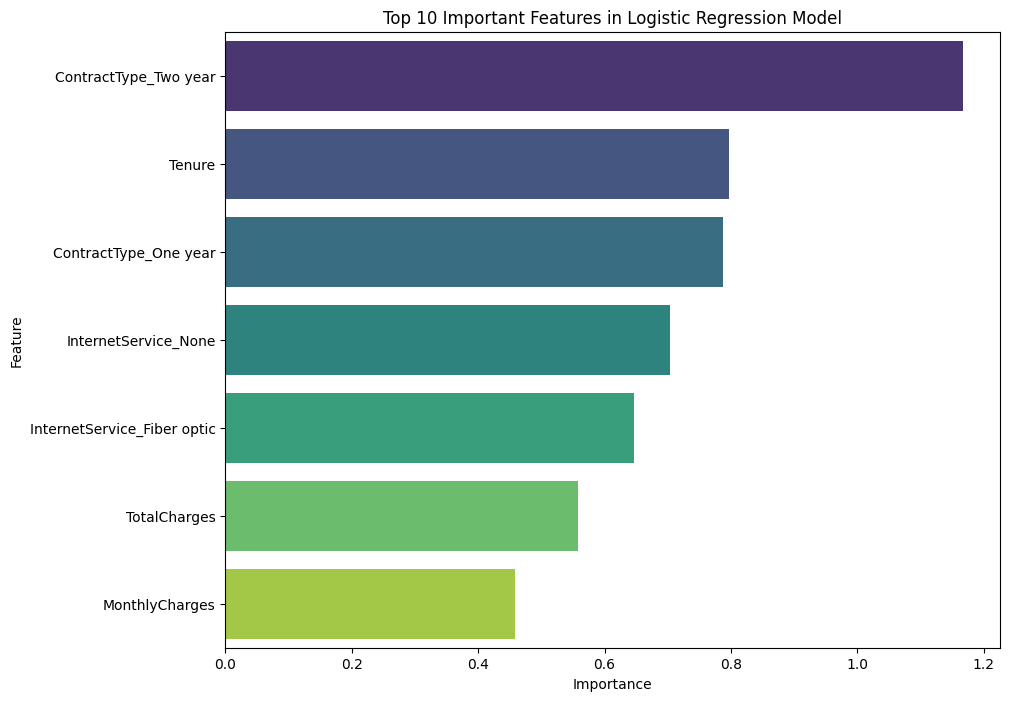

In [238]:
# Feature Importance
feature_importance = np.abs(log_model.coef_[0])
feature_names = X.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})

# Top 10 important features
top_features = importance_df.sort_values(by='Importance', ascending=False).head(10)

plt.figure(figsize=(10, 8))
sns.barplot(x=top_features['Importance'], y=top_features['Feature'], palette='viridis')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top 10 Important Features in Logistic Regression Model')
plt.show()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_22216\2957363189.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=rf_importance_df, x='Importance', y='Feature', palette='viridis')


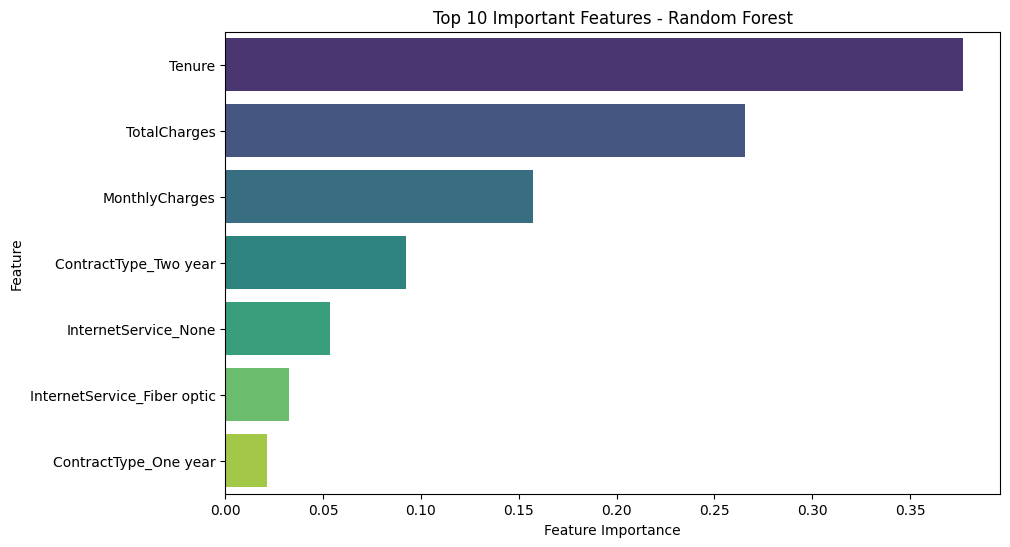

In [239]:
# Assuming best_rf is the optimized Random Forest model 
rf_feature_importances = best_rf.feature_importances_
rf_feature_names = X.columns

# Create a DataFrame for feature importances
rf_importance_df = pd.DataFrame({
    'Feature': rf_feature_names,
    'Importance': rf_feature_importances
})

# Sort the DataFrame by importance and select the top 10 features
rf_importance_df = rf_importance_df.sort_values(by='Importance', ascending=False).head(10)

# Plot the top 10 features for Random Forest
plt.figure(figsize=(10, 6))
sns.barplot(data=rf_importance_df, x='Importance', y='Feature', palette='viridis')
plt.title('Top 10 Important Features - Random Forest')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.show()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_22216\1167006529.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=svm_importance_df, x='Importance', y='Feature', palette='viridis')


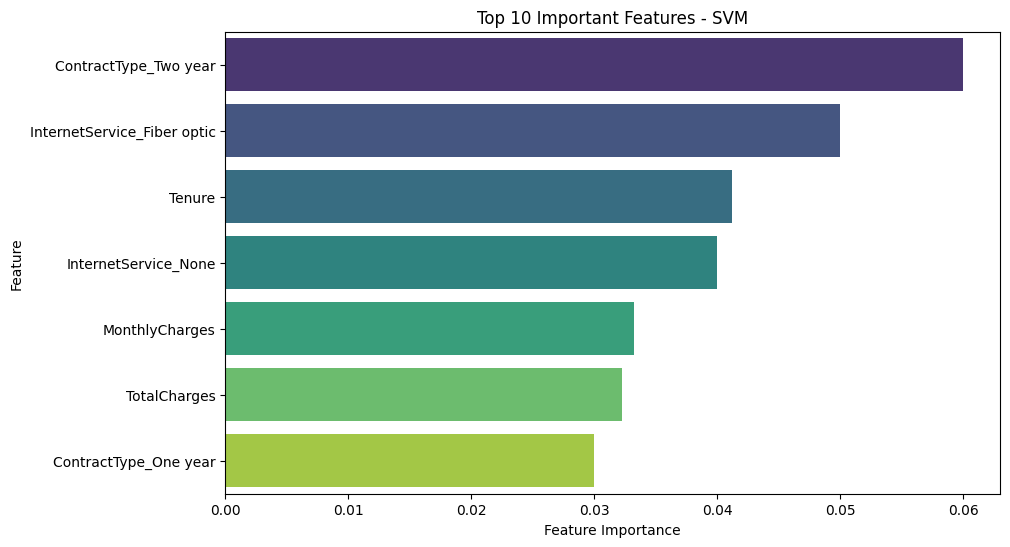

In [240]:
# SVM Feature Importances (only for linear kernel)
svm_feature_names = X.columns
svm_feature_importances = np.abs(best_svm.coef_.ravel())  # Flatten and take absolute values

# Create a DataFrame for feature importances
svm_importance_df = pd.DataFrame({
    'Feature': svm_feature_names,
    'Importance': svm_feature_importances
})

# Sort the DataFrame by importance and select the top 10 features
svm_importance_df = svm_importance_df.sort_values(by='Importance', ascending=False).head(10)

# Plot the top 10 features for SVM
plt.figure(figsize=(10, 6))
sns.barplot(data=svm_importance_df, x='Importance', y='Feature', palette='viridis')
plt.title('Top 10 Important Features - SVM')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.show()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_22216\779724535.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=importance_df, x='Importance', y='Feature', palette='viridis')


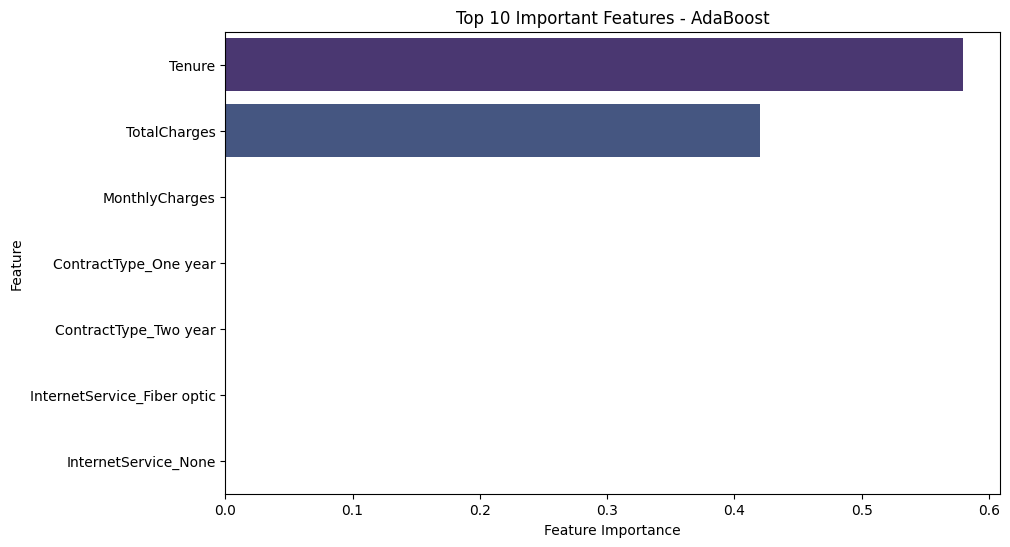

In [241]:
# Step 4: Plot Top 10 Feature Importances
features_importances = ada_model.feature_importances_

# Create a DataFrame for feature importances
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': features_importances
})

# Sort the DataFrame by importance and select the top 10 features
importance_df = importance_df.sort_values(by='Importance', ascending=False).head(10)

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(data=importance_df, x='Importance', y='Feature', palette='viridis')
plt.title('Top 10 Important Features - AdaBoost')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.show()